In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/websitedata.csv",header=1)

In [ ]:
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   channel group                        3182 non-null   object 
 1   Users                                3182 non-null   int64  
 2   Sessions                             3182 non-null   int64  
 3   Engaged sessions                     3182 non-null   int64  
 4   Average engagement time per session  3182 non-null   float64
 5   Engaged sessions per user            3182 non-null   float64
 6   Events per session                   3182 non-null   float64
 7   Engagement rate                      3182 non-null   float64
 8   Event count                          3182 non-null   int64  
 9   Date                                 3182 non-null   object 
 10  Month                                3182 non-null   int32  
 11  Hour                          

#  Data Cleaning

- Date + hour column
- rounding issue in some cols
- fix datatype
- rename col


In [ ]:
df.rename(columns={
    "Session primary channel group (Default channel group)" : "channel group"
    }, inplace = True)

In [ ]:
df['Engaged sessions per user'] = df['Engaged sessions per user'].round(2)
df['Events per session'] = df['Events per session'].round(2)
df['Average engagement time per session'] = df['Average engagement time per session'].round(2)
df['Engagement rate'] = df['Engagement rate'].round(2)

In [ ]:
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'],format = '%Y%m%d%H')

In [ ]:
df['Date'] = df['Date + hour (YYYYMMDDHH)'].dt.date
df['Month'] = df['Date + hour (YYYYMMDDHH)'].dt.month
df['Hour'] = df['Date + hour (YYYYMMDDHH)'].dt.hour



In [ ]:
df.drop(columns="Date + hour (YYYYMMDDHH)",  inplace = True)

# SOLVING BUISNESS PROBLEM


<Axes: xlabel='Hour'>

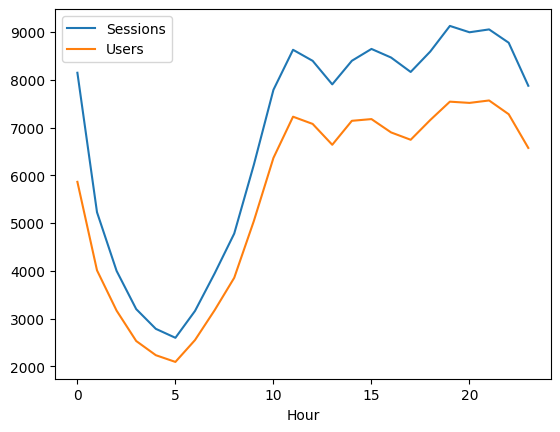

In [ ]:
#What patterns or trend can you observe in website session and users over time ?
df.groupby('Hour')[['Sessions','Users']].sum().plot(kind = "line")


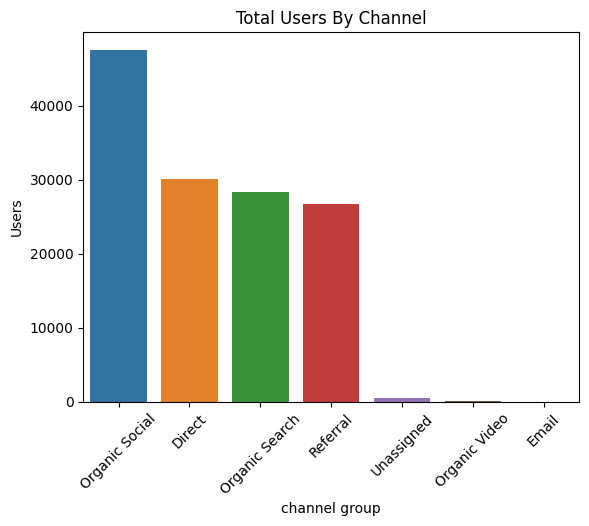

In [ ]:
# which marketing channel brought the highest no of users to the website
#and how can we use this insight to improve traffic from other source
temp = df.groupby('channel group')['Users'].sum().sort_values(ascending= False).reset_index()
sns.barplot(temp,x = "channel group", y = "Users", hue = "channel group")
plt.xticks(rotation = 45)
plt.title("Total Users By Channel")
plt.show()

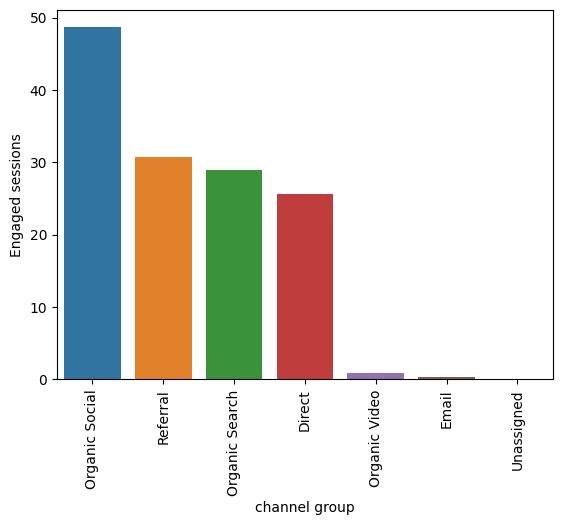

In [ ]:
# which channel has the highest avg engagement time , and what does that
# tell us about user behaviour and content effectiveness
temp2 = df.groupby("channel group")["Engaged sessions"].mean().sort_values(ascending = False).reset_index()
sns.barplot(temp2,x = "channel group", y = "Engaged sessions", hue="channel group")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='channel group', ylabel='Engagement rate'>

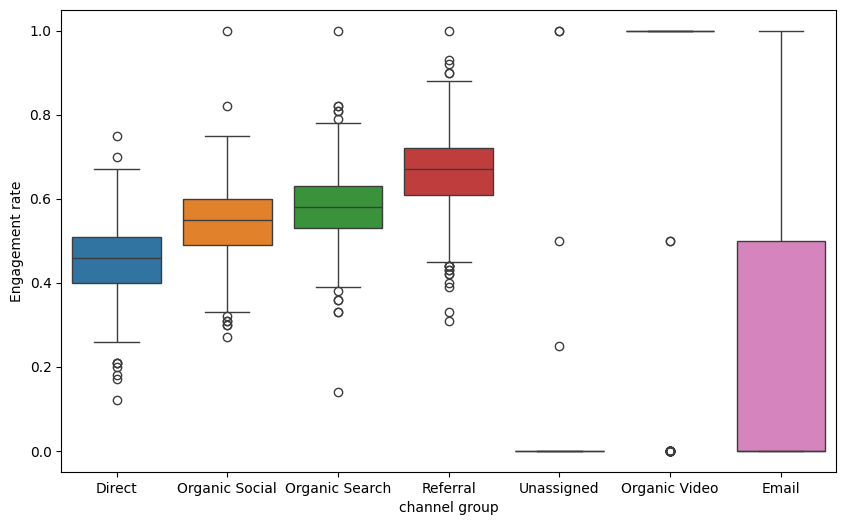

In [ ]:
#How Does Engagement Rate  vary across diffrent traffic channels
plt.figure(figsize=(10,6))
sns.boxplot(df,x = "channel group", y = 'Engagement rate', hue = "channel group")

<Axes: ylabel='Hour'>

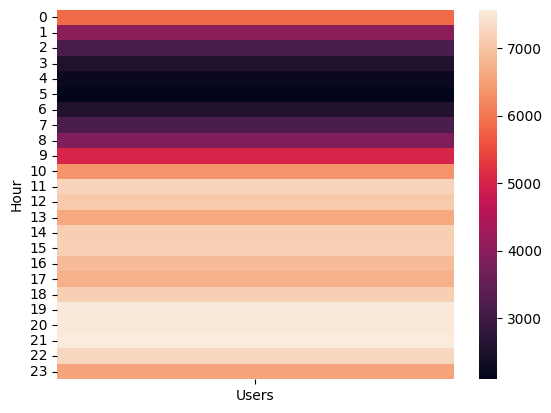

In [ ]:
# At what hours of the day does each channel drive the most traffic
temp3 = df.groupby('Hour')['Users'].sum()
sns.heatmap(pd.DataFrame(temp3))

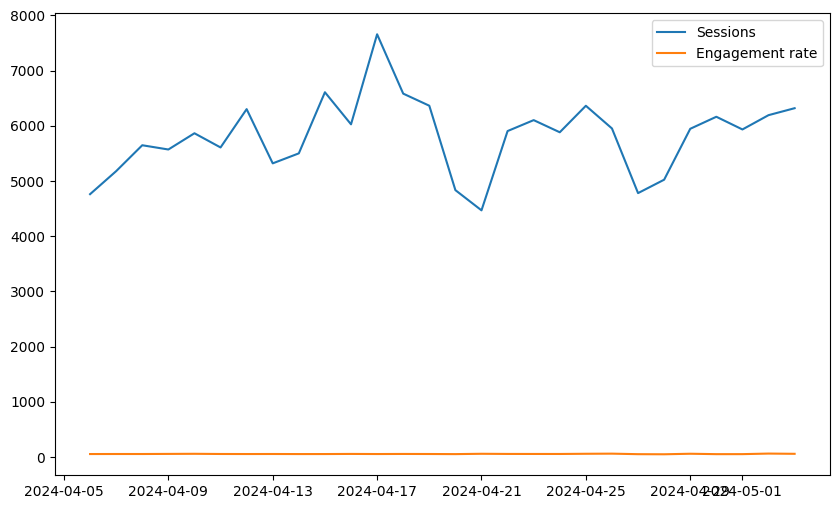

In [ ]:
#  is there any correlation between high traffic (sessions) and high engagement rate over time
temp4 = df.groupby("Date")[['Sessions','Engagement rate']].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(temp4["Date"],temp4["Sessions"] ,label = 'Sessions')
plt.plot(temp4["Date"],temp4["Engagement rate"], label = "Engagement rate")
plt.legend()
plt.show()